In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/C2
%ls

/content/drive/MyDrive/C2
BTC.ipynb  BTC-USD.csv  ETH.ipynb  ETH-USD.csv  my_model.h5


In [3]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("ETH-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [5]:
df.shape

(1598, 7)

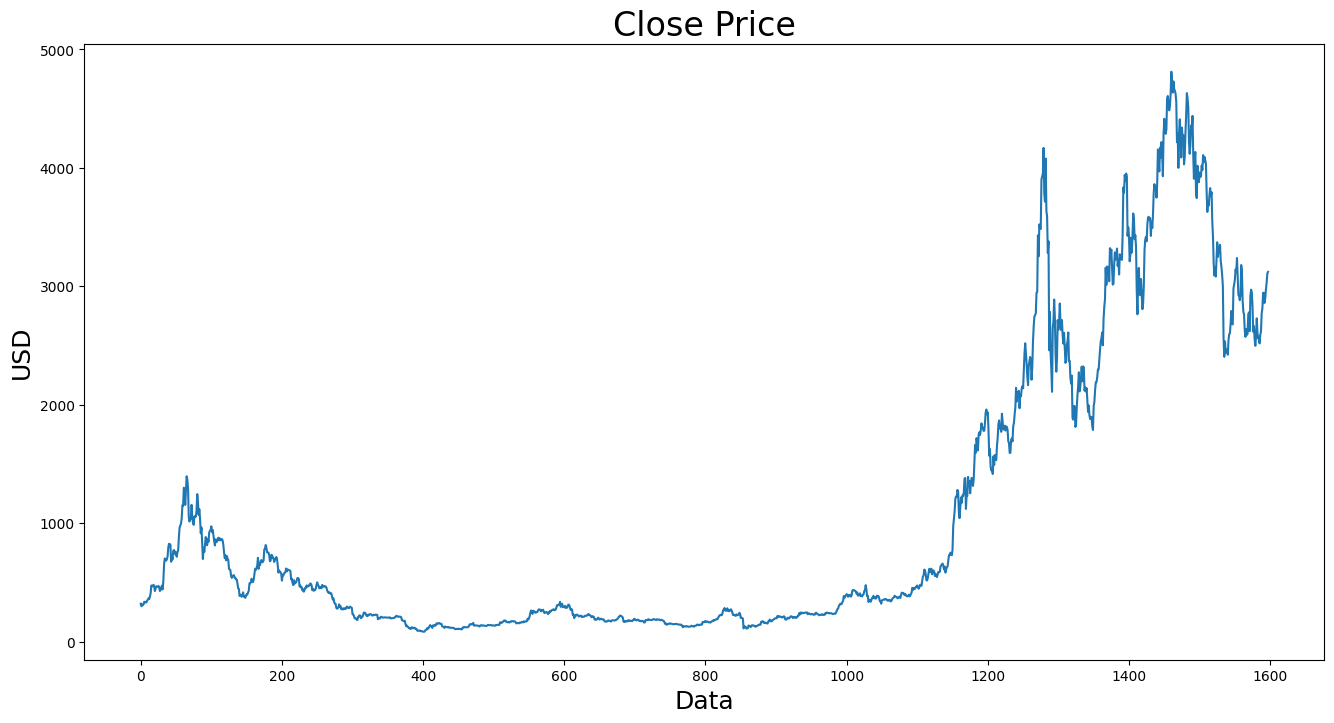

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

In [7]:
#Creat a new dataframe with only Close Price
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on. we need this number to create our train and test sets
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

1279

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872747],
       ...,
       [0.62328607],
       [0.6395717 ],
       [0.64263315]])

In [9]:
# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.0500395 , 0.0454642 , 0.04872747, 0.04729487, 0.0491579 ,
       0.05358176, 0.05267774, 0.05216312, 0.05247405, 0.05569289,
       0.0571257 , 0.05973666, 0.05839797, 0.06268138, 0.06892405,
       0.08261865, 0.08079221, 0.0818612 , 0.08377014, 0.08219371,
       0.07259534, 0.07673914, 0.08084805, 0.08019425, 0.08070273,
       0.08162304, 0.08015872, 0.0728206 , 0.07405162, 0.07862523,
       0.08232062, 0.07559844, 0.09112687, 0.11995542, 0.1308138 ,
       0.12934354, 0.12693903, 0.12942667, 0.13445355, 0.15024744,
       0.15705359, 0.1554171 , 0.15583526, 0.12491102, 0.13432919,
       0.12899074, 0.14415345, 0.14584601, 0.1435206 , 0.13805948,
       0.14156408, 0.13387866, 0.14222845, 0.14559324, 0.16924134,
       0.18579795, 0.18964797, 0.19320101, 0.20249926, 0.22608115])]
[0.22509971577339596]



In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape

(1219, 60, 1)

In [12]:
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [13]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [14]:
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [16]:
model_1.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
10/10 [==============================] - 6s 115ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 2/20
10/10 [==============================] - 1s 125ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/20
10/10 [==============================] - 2s 218ms/step - loss: 6.6588e-04 - mean_squared_error: 6.6588e-04
Epoch 4/20
10/10 [==============================] - 3s 329ms/step - loss: 5.3841e-04 - mean_squared_error: 5.3841e-04
Epoch 5/20
10/10 [==============================] - 3s 230ms/step - loss: 4.3856e-04 - mean_squared_error: 4.3856e-04
Epoch 6/20
10/10 [==============================] - 2s 181ms/step - loss: 3.9079e-04 - mean_squared_error: 3.9079e-04
Epoch 7/20
10/10 [==============================] - 1s 122ms/step - loss: 3.5235e-04 - mean_squared_error: 3.5235e-04
Epoch 8/20
10/10 [==============================] - 1s 113ms/step - loss: 3.5036e-04 - mean_squared_error: 3.5036e-04
Epoch 9/20
10/10 [==============================] - 1s 114ms/step - loss

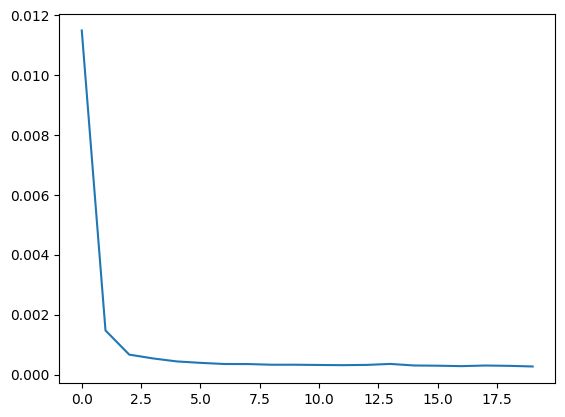

In [18]:
plt.plot(history.history['loss'])

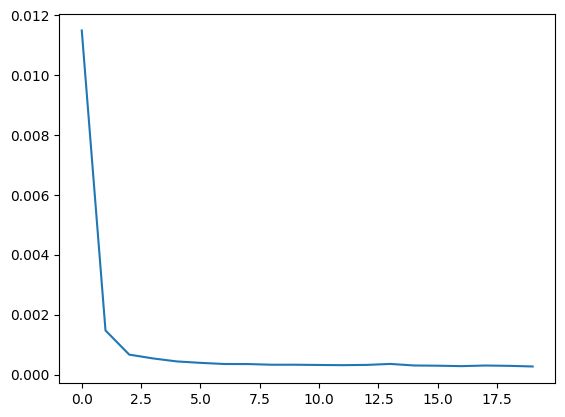

In [19]:
plt.plot(history.history['mean_squared_error'])

In [20]:
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

10/10 [==============================] - 1s 19ms/step


319

In [21]:
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

486.6842703067692

In [22]:
num_days = 100
def test_data_days(scaled_data, num_days):
    #Create the data sets X_test and y_test
    X_test = []
    y_test = dataset[training_data_len : , :]
    for i in range(num_days):
        index = 60 + i
        X_test.append(scaled_data[index-60 : index, 0])
    N_test = len(X_test)
    return np.asarray(X_test[N_test - num_days:])

In [23]:
test_data = test_data_days(scaled_data, num_days=num_days)
test_data = np.expand_dims(test_data, axis=2)
result = model_1.predict(test_data)
result = scaler.inverse_transform(result)
len(result)

4/4 [==============================] - 0s 18ms/step


100

100


<ipython-input-24-ee1d1bb199a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = result


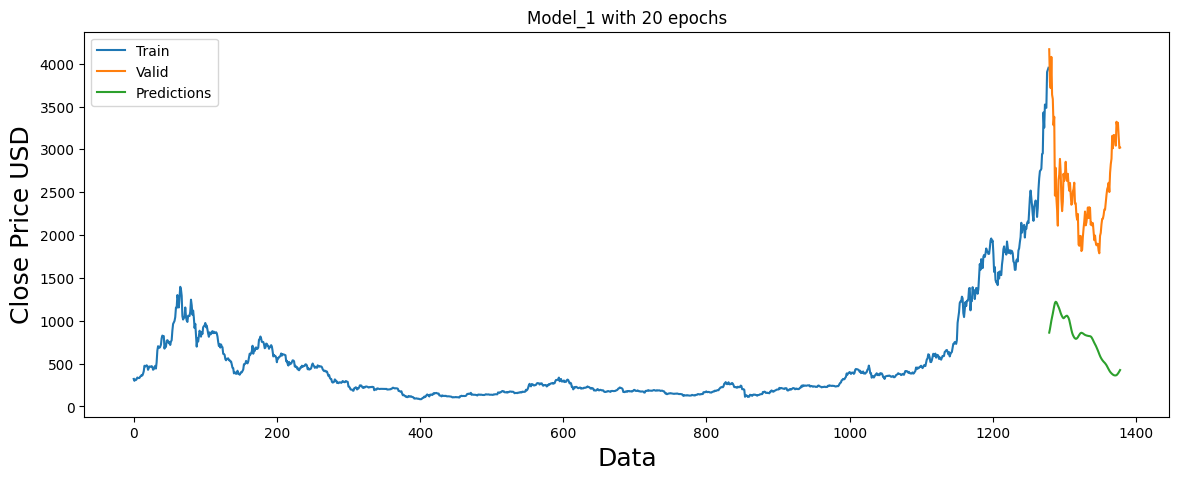

In [24]:
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:training_data_len+num_days]
print(len(valid_1))
valid_1['Predictions'] = result

# Visualized the data
#model_1
plt.figure(figsize=(14, 5))
plt.title('Model_1 with 20 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')


plt.show()

In [25]:
model_1.save('my_model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
